In [ ]:
# Import relevant items
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [13]:
# get data
# hsx
df = pd.read_csv('CafeF.HSX.Upto29.03.2019.csv')
# vn30 ky 1 2019
frames = [df[df['<Ticker>']== 'CMG']]
df = pd.concat(frames)

In [15]:
df.drop(['<Ticker>','<Open>','<High>','<Low>','<Volume>'], inplace=True, axis = 1)
df['<DTYYYYMMDD>'] = pd.to_datetime(df['<DTYYYYMMDD>'].astype(str), format = '%Y%m%d')
model = Prophet()
df.columns = ['ds', 'y']
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future_stock_data = model.make_future_dataframe(periods=10, freq = 'd')
forecast_data = model.predict(future_stock_data)

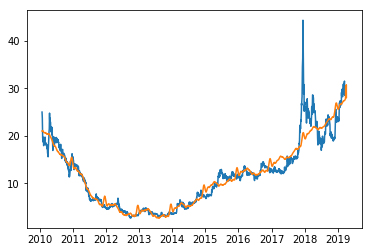

In [19]:
plt.plot(df.ds,df.y)
plt.plot(forecast_data.ds,forecast_data.yhat)

In [90]:
# only close
testY_inverse = df.y[::-1].values
y_predict = forecast_data.yhat.values
now_yhat = y_predict[1:]
yes_yhat = y_predict[:-1]
now = testY_inverse[1:]
yes = testY_inverse[:-1]
print("P: ", np.nansum((now - yes)*(now_yhat[0:2274]- yes_yhat[0:2274]) > 0)/2274)
from sklearn.metrics import r2_score
print("R^2: ",r2_score(testY_inverse, forecast_data.yhat[0:2275]))

P:  0.4001759014951627
R^2:  0.9052361726195122


In [85]:
df.y[::-1].values

array([24.9803, 23.7669, 22.625 , ..., 29.9   , 30.25  , 30.    ])

In [80]:
len(a - b)

2285